<a href="https://colab.research.google.com/github/Maithili-Badhan/DL-with-Tensorflow/blob/main/Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential API

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#create a sequential model
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (784,)),
    Dense(10, activation = 'softmax')
])

#compile the model
model.compile(optimizer='adam', loss='spare_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Functional API

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
inputs = Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Complex model with multiple inputs

In [ ]:
from tensorflow.keras.layers import concatenate

inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

x = Dense(8, activation='relu')(inputA)
x = Dense(4, activation='relu')(x)
x = Model(inputs = inputA, outputs = x)

y = Dense(16, activation='relu')(inputB)
y = Dense(8, activation='relu')(y)
y = Model(inputs = inputB, outputs = y)

combined = concatenate([x.output, y.output])

z = Dense(2, activation='relu')(combined)
z = Dense(1, activation='linear')(z)

model = Model(inputs=[x.input, y.input], outputs=z)

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Shared layers and complex architectures

from tensorflow.keras.layers import Lambda

input = Input(shape = (28,28,1))
conv_base = Dense(64, activation='relu')
processed_1 = conv_base(input)
processed_2 = conv_base(input)

model = Model(inputs = input, outputs = [processed_1, processed_2])

In [ ]:
#Practical Example

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.activations import relu, linear

inputA = Input(shape=(32,32,1))
x = Conv2D(32, (3,3), activation=relu)(inputA)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Model(inputs = inputA, outputs = x)

inputB = Input(shape=(32,32,1))
y = Conv2D(32,(3,3), activation=relu)(inputB)
y = MaxPooling2D((2,2))(y)
y = Flatten()(y)
y = Model(inputs = inputB, outputs = y)

combined = concatenate([x.output, y.output])

z = Dense(64, activation=relu)(combined)
z = Dense(1, activation=linear)(z)

model = Model(inputs=[x.input, y.input], outputs=z)

#Keras Subclassing API

In [ ]:
import tensorflow as tf

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)

model = MyModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#use case example
import tensorflow as tf

epochs= 5

(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28*28).astype("float32") / 255

train_labels = train_labels.astype("int32")

#create a tf.data dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)

for epoch in range(epochs):
  print(f"Epoch {epoch+1} / {epochs}")
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      predictions = model(x_batch, Training=True)
      loss = loss_fn(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

# Dynamic Graphs

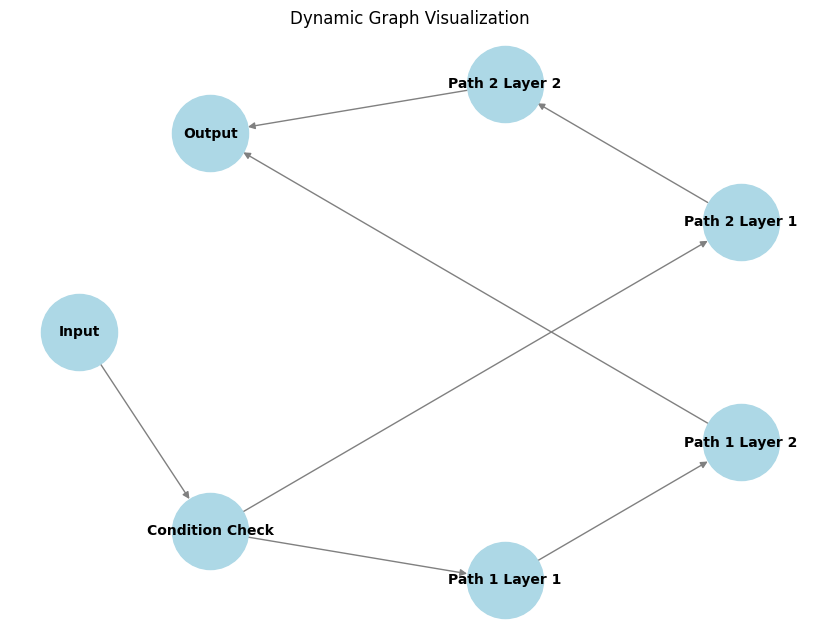

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_node("Input")
G.add_node("Condition Check")
G.add_node("Path 1 Layer 1")
G.add_node("Path 1 Layer 2")
G.add_node("Path 2 Layer 1")
G.add_node("Path 2 Layer 2")
G.add_node("Output")

G.add_edges_from([("Input", "Condition Check"),
                  ("Condition Check", "Path 1 Layer 1"),
                  ("Path 1 Layer 1", "Path 1 Layer 2"),
                  ("Path 1 Layer 2", "Output"),
                  ("Condition Check", "Path 2 Layer 1"),
                  ("Path 2 Layer 1", "Path 2 Layer 2"),
                  ("Path 2 Layer 2", "Output")])

pos = nx.shell_layout(G)

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10,
        font_weight = 'bold', edge_color='gray')
plt.title('Dynamic Graph Visualization')
plt.show()

# Lab Session _ 1

## Lab: Implementing the Functional API in Keras

**Estimated time needed: 30 minutes**

In this lab, you will implement Keras functional API to build a neural network model. This lab will guide you through the steps of creating an input layer, adding hidden layers, and defining an output layer using the Functional API.

##### Learning objectives:

By the end of this lab, you will:

- Use the Keras Functional API to build a simple neural network model.

- Create an input layer, add hidden layers, and define an output layer using the Functional API.

##### Prerequisites:

- Basic understanding of Python programming

- Familiarity with neural network concepts
  
- Keras and TensorFlow installed




In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

In [2]:
input_layer = Input(shape=(20,))
print(input_layer)

<KerasTensor shape=(None, 20), dtype=float32, sparse=False, name=keras_tensor>


In [3]:
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)

In [4]:
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

In [5]:
model = Model(inputs= input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
import numpy as np
X_train = np.random.rand(1000,20)
y_train = np.random.randint(2, size=(1000,1))
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4810 - loss: 0.6991
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5392 - loss: 0.6889
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5684 - loss: 0.6869
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 0.6850
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 0.6803
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5789 - loss: 0.6845
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 0.6795
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5927 - loss: 0.6753
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6039 - loss: 0.6706
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5956 - loss: 0.6731


### Dropout and Batch Normalization

Before we proceed with the practice exercise, let's briefly discuss two important techniques often used to improve the performance of neural networks: **Dropout Layers** and **Batch Normalization**.

#### Dropout Layers

Dropout is a regularization technique that helps prevent overfitting in neural networks. During training, Dropout randomly sets a fraction of input units to zero at each update cycle. This prevents the model from becoming overly reliant on any specific neurons, which encourages the network to learn more robust features that generalize better to unseen data.

**Key points:**
- Dropout is only applied during training, not during inference.
- The dropout rate is a hyperparameter that determines the fraction of neurons to drop.


#### Batch Normalization

Batch Normalization is a technique used to improve the training stability and speed of neural networks. It normalizes the output of a previous layer by re-centering and re-scaling the data, which helps in stabilizing the learning process. By reducing the internal covariate shift (the changes in the distribution of layer inputs), batch normalization allows the model to use higher learning rates, which often speeds up convergence.

**Key Points:**

- Batch normalization works by normalizing the inputs to each layer to have a mean of zero and a variance of one.
- It is applied during both training and inference, although its behavior varies slightly between the two phases.
- Batch normalization layers also introduce two learnable parameters that allow the model to scale and - shift the normalized output, which helps in restoring the model's representational power.
